# Clean Glass Data:

In [1]:
import numpy as np
import pandas as pd
import os
from sympy import*
init_printing()
from dtumathtools import dtuplot

In [4]:
# Read the csv file
filename = 'glass.csv'
df = pd.read_csv(filename)

# Convert the dataframe to numpy array
raw_data = df.values

# Naming the attributes since they are in a different csv file
attribute_names = ['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type'] 

In [5]:
# Removing the ID attribute
raw_data = raw_data[:,1:]

cols = range(0,10) # 10 columns
data = raw_data[:,cols] # defining the data matrix

In [6]:
# Standardize the data, execept last column which is the type of glass
for i in range(0,8):
    data[:,i] = (data[:,i] - data[:,i].mean()) / data[:,i].std()

In [7]:
data_wo_type = data[:,0:9] # data without the type of glass

In [12]:
# Using the one-out-of-K encoding for the last column
type = data[:,9]

encoding = np.zeros((len(type),7)) # creating a matrix of zeroes

# Here I am using a nested for loop to replace the zero in the matrix with a one if the type of glass is equal to the number
for i in range(0,len(type)):
    for j in range(0,7):
        if type[i] == j+1:
            encoding[i,j] = 1

# Combining the data and the encoding by using the concatenate function from numpy
data = np.concatenate((data_wo_type,encoding),axis=1)


In [15]:
print(data[:2]) # This is just for visuals of the data. It is now all standardized and encoded the way we want it.
print(data.shape) # We have 16 columns, but only 9 attributes. This is because of the one-out-of-K encoding.

[[-0.2451006   0.59188032  0.64293659 -0.17350018  0.09709059 -0.02932918
  -0.79259935 -0.35380764  0.          1.          0.          0.
   0.          0.          0.          0.        ]
 [-0.71682556  0.15094587  0.60814353  0.18743291  0.43377668 -0.16747177
  -0.82773435 -0.35380764  0.          1.          0.          0.
   0.          0.          0.          0.        ]]
(213, 16)


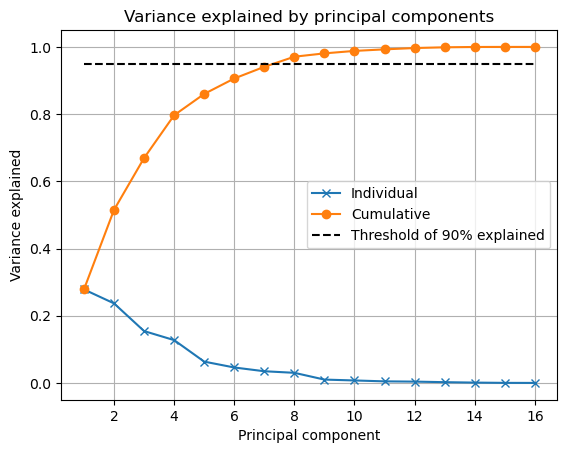

In [10]:
# PCA using SVD
from scipy.linalg import svd
import matplotlib.pyplot as plt

U,S,V = svd(data,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.95

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold of 90% explained'])
plt.grid()
plt.show()

In [11]:
V[0,:] # First principal component

array([ 0.51249232, -0.27340521,  0.17456513, -0.46851026, -0.20797737,
       -0.20748328,  0.45388194, -0.30732119,  0.01245591,  0.08220375,
        0.05694522,  0.01331253,  0.        , -0.00892663, -0.00706262,
       -0.12411762])